In [79]:
library(tidyverse)

# load Heart Disease (hd) data
hd_data = read.csv("Cleveland_hd.csv")

# Quick look
glimpse(hd_data)
summary(hd_data)


Rows: 303
Columns: 15
$ index    <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18…
$ age      <int> 63, 67, 67, 37, 41, 56, 62, 57, 63, 53, 57, 56, 56, 44, 52, 5…
$ sex      <int> 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1…
$ cp       <int> 1, 4, 4, 3, 2, 2, 4, 4, 4, 4, 4, 2, 3, 2, 3, 3, 2, 4, 3, 2, 1…
$ trestbps <int> 145, 160, 120, 130, 130, 120, 140, 120, 130, 140, 140, 140, 1…
$ chol     <int> 233, 286, 229, 250, 204, 236, 268, 354, 254, 203, 192, 294, 2…
$ fbs      <int> 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0…
$ restecg  <int> 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2…
$ thalach  <int> 150, 108, 129, 187, 172, 178, 160, 163, 147, 155, 148, 153, 1…
$ exang    <int> 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1…
$ oldpeak  <dbl> 2.3, 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 1.4, 3.1, 0.4, 1.3, 0…
$ slope    <int> 3, 2, 2, 3, 1, 1, 3, 1, 2, 3, 2, 2, 2, 1, 1, 1, 3, 1, 1, 1, 2…
$ ca       <chr> "

     index            age             sex               cp       
 Min.   :  1.0   Min.   :29.00   Min.   :0.0000   Min.   :1.000  
 1st Qu.: 76.5   1st Qu.:48.00   1st Qu.:0.0000   1st Qu.:3.000  
 Median :152.0   Median :56.00   Median :1.0000   Median :3.000  
 Mean   :152.0   Mean   :54.44   Mean   :0.6799   Mean   :3.158  
 3rd Qu.:227.5   3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:4.000  
 Max.   :303.0   Max.   :77.00   Max.   :1.0000   Max.   :4.000  
    trestbps          chol            fbs            restecg      
 Min.   : 94.0   Min.   :126.0   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:120.0   1st Qu.:211.0   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :130.0   Median :241.0   Median :0.0000   Median :1.0000  
 Mean   :131.7   Mean   :246.7   Mean   :0.1485   Mean   :0.9901  
 3rd Qu.:140.0   3rd Qu.:275.0   3rd Qu.:0.0000   3rd Qu.:2.0000  
 Max.   :200.0   Max.   :564.0   Max.   :1.0000   Max.   :2.0000  
    thalach          exang           oldpeak         slope      
 Min

In [93]:
hd_data = hd_data %>%
  mutate(
    class = as.numeric(class),           # ensure class is numeric
    target = ifelse(class > 0, 1, 0)     # 1 = heart disease present, 0 = no disease
  ) %>%
  rename(hd = class)                     # rename 'class' column to 'hd'


ERROR: [1m[33mError[39m in `mutate()`:[22m
[1m[22m[36mℹ[39m In argument: `class = as.numeric(class)`.
[1mCaused by error in `as.numeric()`:[22m
[33m![39m cannot coerce type 'builtin' to vector of type 'double'


In [94]:
names(hd_data)

[1] "index"    "age"      "sex"      "cp"       "trestbps" "chol"    
 [7] "fbs"      "restecg"  "thalach"  "exang"    "oldpeak"  "slope"   
[13] "ca"       "thal"     "hd"       "target"

In [84]:
# count NAs by column
colSums(is.na(hd_data))

# look at main variables
hd_data %>%
  select(age, sex, thalach, trestbps, chol, exang, target) %>%
  summary()

index      age      sex       cp trestbps     chol      fbs  restecg 
       0        0        0        0        0        0        0        0 
 thalach    exang  oldpeak    slope       ca     thal    class   target 
       0        0        0        0        0        0        0        0

      age             sex            thalach         trestbps    
 Min.   :29.00   Min.   :0.0000   Min.   : 71.0   Min.   : 94.0  
 1st Qu.:48.00   1st Qu.:0.0000   1st Qu.:133.5   1st Qu.:120.0  
 Median :56.00   Median :1.0000   Median :153.0   Median :130.0  
 Mean   :54.44   Mean   :0.6799   Mean   :149.6   Mean   :131.7  
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:166.0   3rd Qu.:140.0  
 Max.   :77.00   Max.   :1.0000   Max.   :202.0   Max.   :200.0  
      chol           exang            target      
 Min.   :126.0   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:211.0   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :241.0   Median :0.0000   Median :0.0000  
 Mean   :246.7   Mean   :0.3267   Mean   :0.4587  
 3rd Qu.:275.0   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :564.0   Max.   :1.0000   Max.   :1.0000  

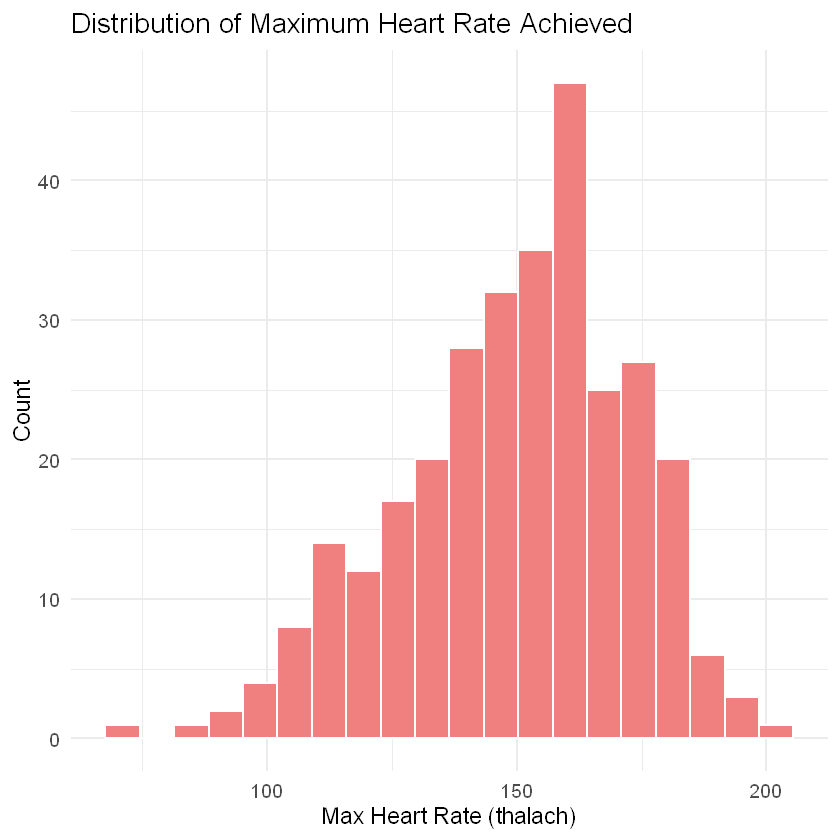

In [85]:
#Plot distribution of heart rate variable
ggplot(hd_data, aes(x = thalach)) +
  geom_histogram(bins = 20, color = "white", fill = "lightcoral") +
  labs(
    title = "Distribution of Maximum Heart Rate Achieved",
    x = "Max Heart Rate (thalach)",
    y = "Count"
  ) +
  theme_minimal(base_size = 14)

ggsave("maxHeartRate_distribution.png", width = 7, height = 5, dpi = 300)

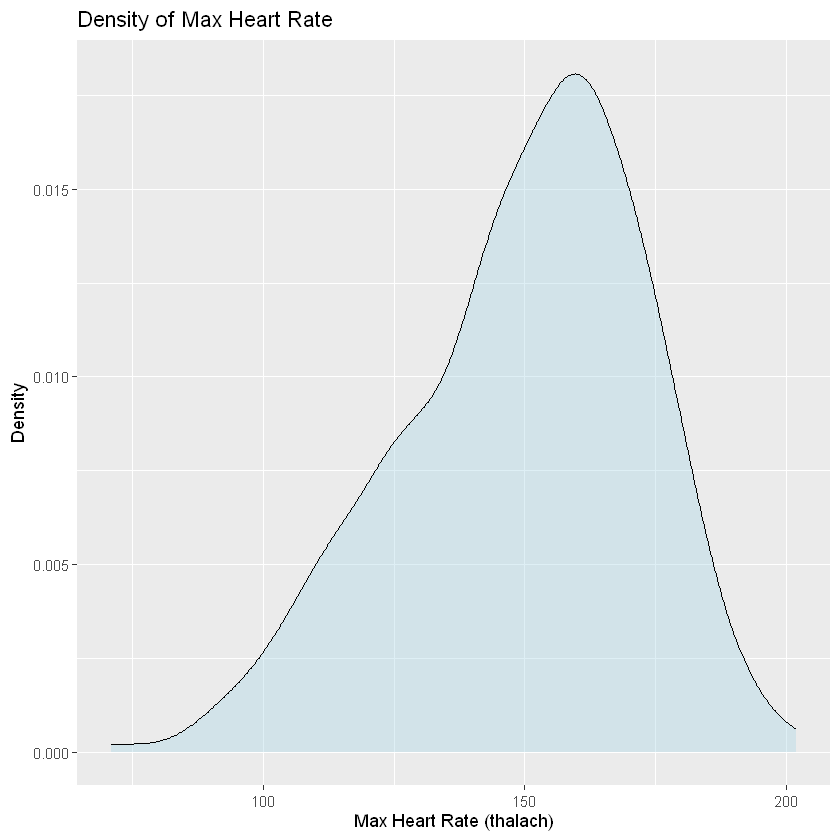

In [35]:
ggplot(hd_data, aes(x = thalach)) +
  geom_density(fill = "lightblue", alpha = 0.4) +
  labs(title = "Density of Max Heart Rate",
      x = "Max Heart Rate (thalach)",
      y = "Density")
ggsave("Density.png", width = 7, height = 5, dpi = 300)

In [98]:
# Create a binary grouping variable (0 = no disease, 1 = any disease)
hd_data = hd_data %>%
  mutate(hd_binary = ifelse(hd > 0, 1, 0))

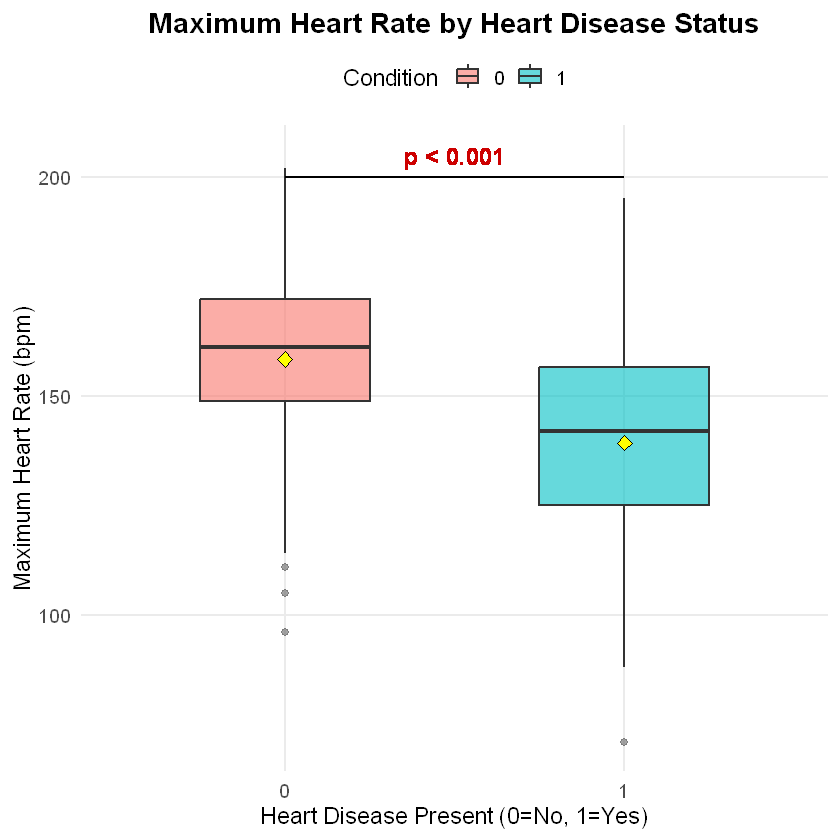

In [99]:
# Run t-test
t_test_result = t.test(thalach ~ hd_binary, data = hd_data)
p_value = t_test_result$p.value

# Compute group means and SE
group_summary = hd_data %>%
  group_by(hd_binary) %>%
  summarise(
    mean_thalach = mean(thalach, na.rm = TRUE),
    sd_thalach = sd(thalach, na.rm = TRUE),
    n = n(),
    se_thalach = sd_thalach / sqrt(n)
  )

# Create boxplot with mean markers and manual p-value label
ggplot(hd_data, aes(x = factor(hd_binary), y = thalach, fill = factor(hd_binary))) +
  geom_boxplot(alpha = 0.6, outlier.color = "gray40", width = 0.5) +
  geom_point(
    data = group_summary,
    aes(x = factor(hd_binary), y = mean_thalach),
    color = "black", shape = 23, size = 3, fill = "yellow"
  ) +
  geom_segment(aes(x = 1, xend = 2, y = 200, yend = 200), color = "black") +
  geom_text(aes(x = 1.5, y = 205,
                label = paste0("p < ", ifelse(p_value < 0.001, "0.001", round(p_value, 3)))),
            size = 5, color = "red3", fontface = "bold") +
  labs(
    title = "Maximum Heart Rate by Heart Disease Status",
    x = "Heart Disease Present (0=No, 1=Yes)",
    y = "Maximum Heart Rate (bpm)",
    fill = "Condition"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5),
    legend.position = "top",
    panel.grid.minor = element_blank()
  )

ggsave("boxplot.png", width = 7, height = 5, dpi = 300)

In [15]:
hd_data %>%
  group_by(hd) %>%
  summarise(
    n = n(),
    mean_thalach = mean(thalach, na.rm = TRUE),
    sd_thalach = sd(thalach, na.rm = TRUE)
  )


hd,n,mean_thalach,sd_thalach
<dbl>,<int>,<dbl>,<dbl>
0,164,158.378,19.19908
1,139,139.259,22.59323


In [101]:
#Statistical test:
t.test(thalach ~ hd_binary, data = hd_data)


	Welch Two Sample t-test

data:  thalach by hd_binary
t = 7.8579, df = 272.27, p-value = 9.106e-14
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 14.32900 23.90912
sample estimates:
mean in group 0 mean in group 1 
        158.378         139.259 


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


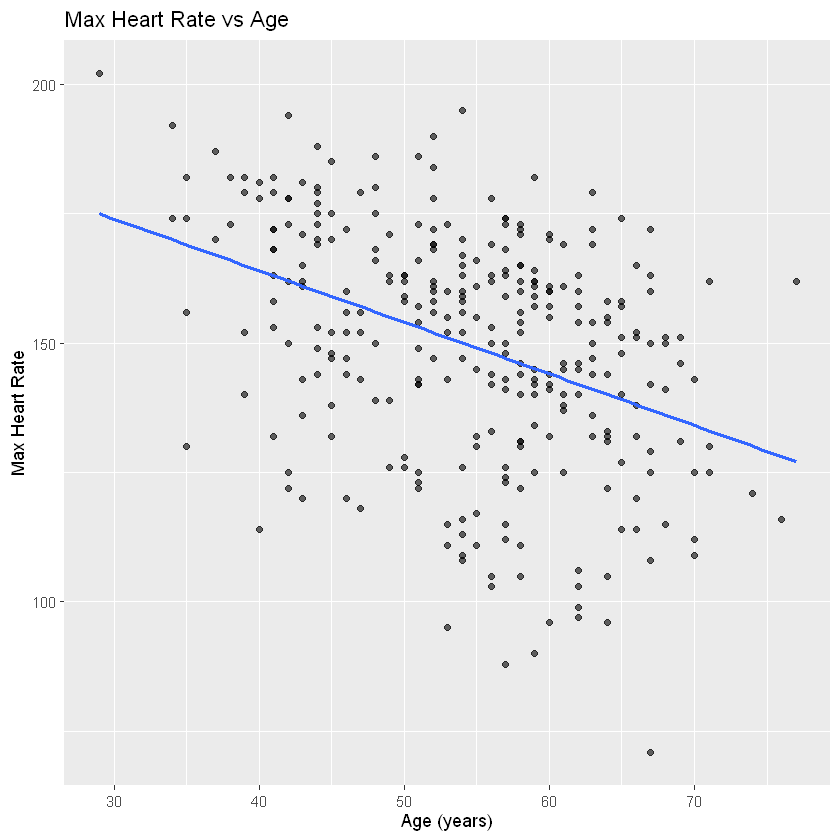

In [40]:
#Bring in age — because age affects heart rate
ggplot(hd_data, aes(x = age, y = thalach)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "Max Heart Rate vs Age",
       x = "Age (years)",
       y = "Max Heart Rate")
ggsave("max heart rate vs age.png", width = 7, height = 5, dpi = 300)

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


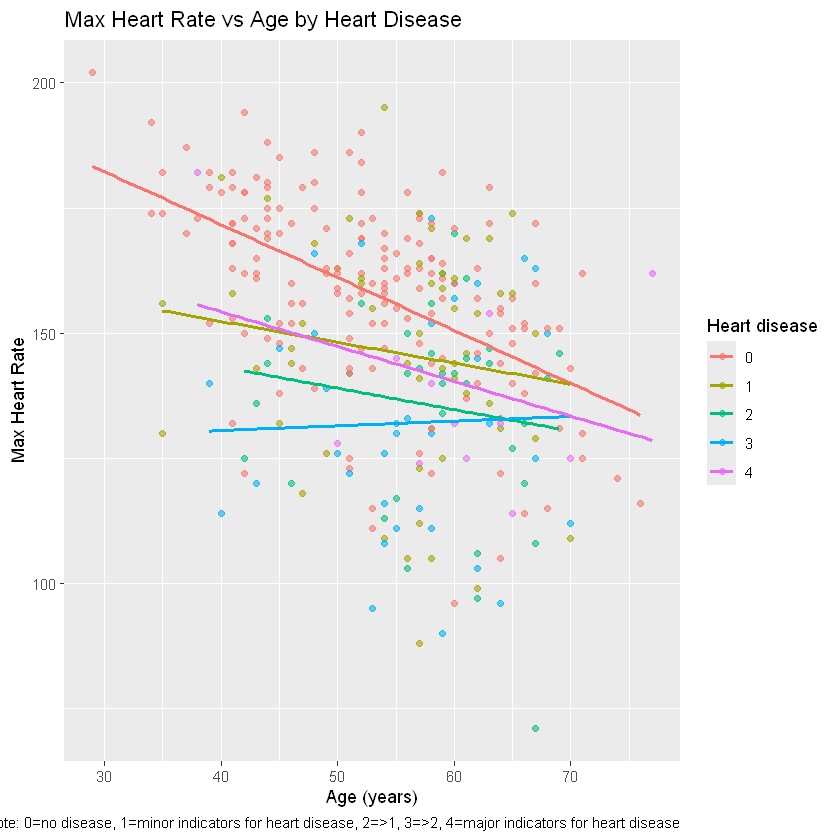

In [44]:
ggplot(hd_data, aes(x = age, y = thalach, color = factor(target))) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "Max Heart Rate vs Age by Heart Disease",
       caption = "Note: 0=no disease, 1=minor indicators for heart disease, 2=>1, 3=>2, 4=major indicators for heart disease",
       x = "Age (years)",
       y = "Max Heart Rate",
       color = "Heart disease")
ggsave("max heart rate vs age by disease.png", width = 7, height = 5, dpi = 300)

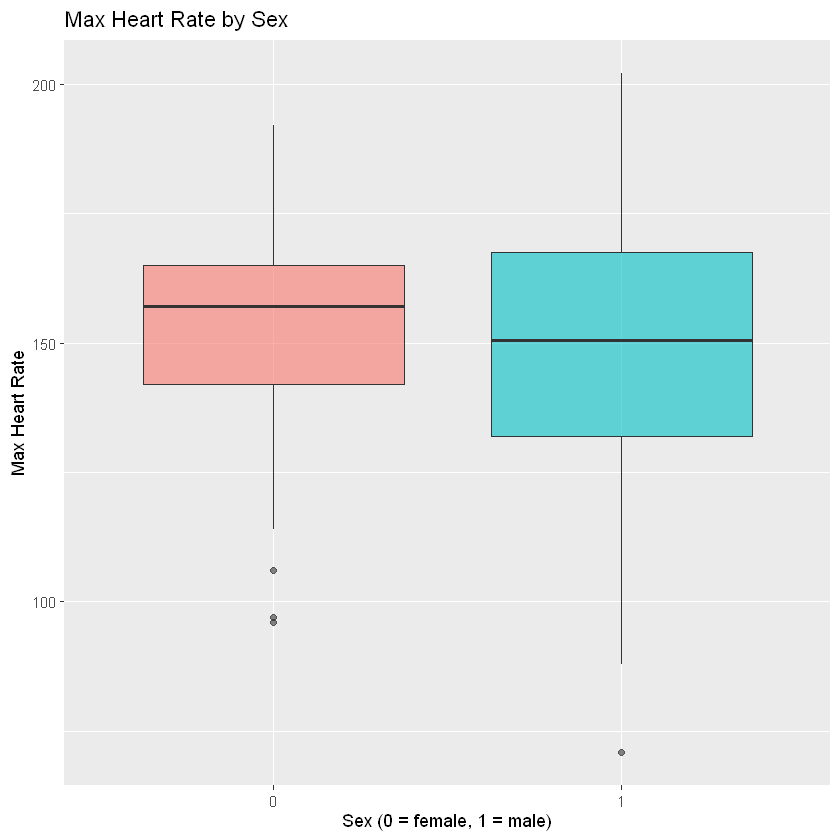

In [46]:
#Add sex/gender — the dataset has it
ggplot(hd_data, aes(x = factor(sex), y = thalach, fill = factor(sex))) +
  geom_boxplot(alpha = 0.6) +
  labs(title = "Max Heart Rate by Sex",
       x = "Sex (0 = female, 1 = male)",
       y = "Max Heart Rate") +
  theme(legend.position = "none")
ggsave("max heart rate vs sex.png", width = 7, height = 5, dpi = 300)

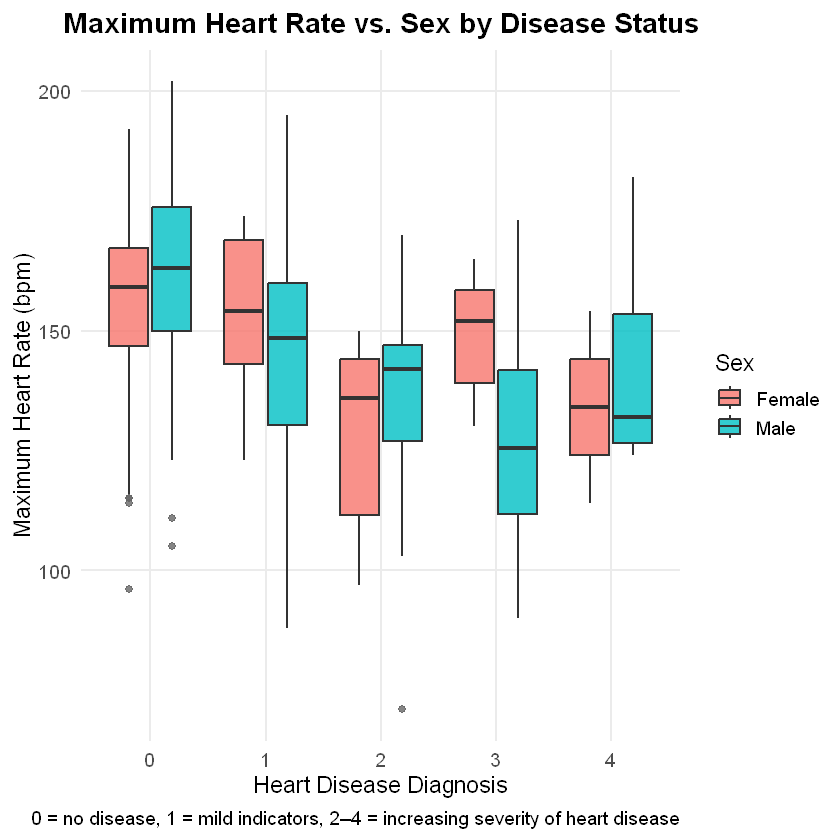

In [75]:
# Create the boxplot with labeled sexes
ggplot(hd_data, aes(x = factor(target), y = thalach, fill = factor(sex))) +
  geom_boxplot(alpha = 0.8, outlier.color = "gray40") +
  scale_fill_manual(
    values = c("0" = "#F8766D", "1" = "#00BFC4"),
    labels = c("Female", "Male")
  ) +
  labs(
    title = "Maximum Heart Rate vs. Sex by Disease Status",
    caption = "0 = no disease, 1 = mild indicators, 2–4 = increasing severity of heart disease",
    x = "Heart Disease Diagnosis",
    y = "Maximum Heart Rate (bpm)",
    fill = "Sex"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5),
    plot.subtitle = element_text(color = "gray30", hjust = 0.5),
    legend.position = "right",
    panel.grid.minor = element_blank()
  )

# Save plot
ggsave("max_heart_rate_vs_sex_by_disease.png", width = 7, height = 5, dpi = 300)

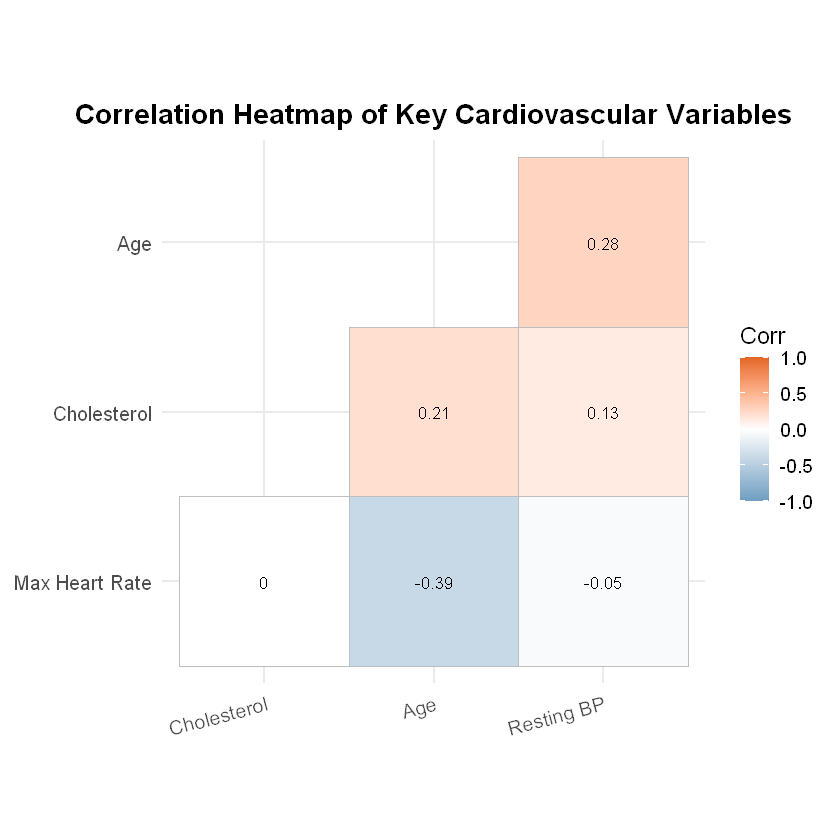

In [102]:
# Select numeric variables and rename for clarity
numeric_vars = hd_data %>%
  select(
    "Age" = age,
    "Resting BP" = trestbps,
    "Cholesterol" = chol,
    "Max Heart Rate" = thalach
  )

# Compute correlation matrix
cor_matrix = cor(numeric_vars, use = "complete.obs")

# Load package
library(ggcorrplot)

# Create heatmap
ggcorrplot(
  cor_matrix,
  hc.order = TRUE,
  type = "lower",
  lab = TRUE,
  lab_size = 3.5,
  colors = c("#6D9EC1", "white", "#E46726"),
  title = "Correlation Heatmap of Key Cardiovascular Variables",
  ggtheme = ggplot2::theme_minimal(base_size = 14)
) +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    axis.text.x = element_text(angle = 15, vjust = 1, hjust = 1)
  )
ggsave("correlation heatmap.png", width = 7, height = 5, dpi = 300)

In [104]:
# Logistic Model 1: Heart disease ~ Maximum heart rate
model1 <- glm(hd_binary ~ thalach, data = hd_data, family = binomial)
summary(model1)

# Logistic Model 2: Adjusted for age and sex
model2 <- glm(hd_binary ~ thalach + age + sex, data = hd_data, family = binomial)
summary(model2)


Call:
glm(formula = hd_binary ~ thalach, family = binomial, data = hd_data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  6.32495    0.98437   6.425 1.32e-10 ***
thalach     -0.04341    0.00651  -6.668 2.59e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 417.98  on 302  degrees of freedom
Residual deviance: 360.90  on 301  degrees of freedom
AIC: 364.9

Number of Fisher Scoring iterations: 4



Call:
glm(formula = hd_binary ~ thalach + age + sex, family = binomial, 
    data = hd_data)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.111610   1.607466   1.936   0.0529 .  
thalach     -0.040541   0.007073  -5.732 9.93e-09 ***
age          0.031886   0.016440   1.940   0.0524 .  
sex          1.491902   0.307193   4.857 1.19e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 417.98  on 302  degrees of freedom
Residual deviance: 332.85  on 299  degrees of freedom
AIC: 340.85

Number of Fisher Scoring iterations: 4


Setting levels: control = 0, case = 1

Setting direction: controls < cases



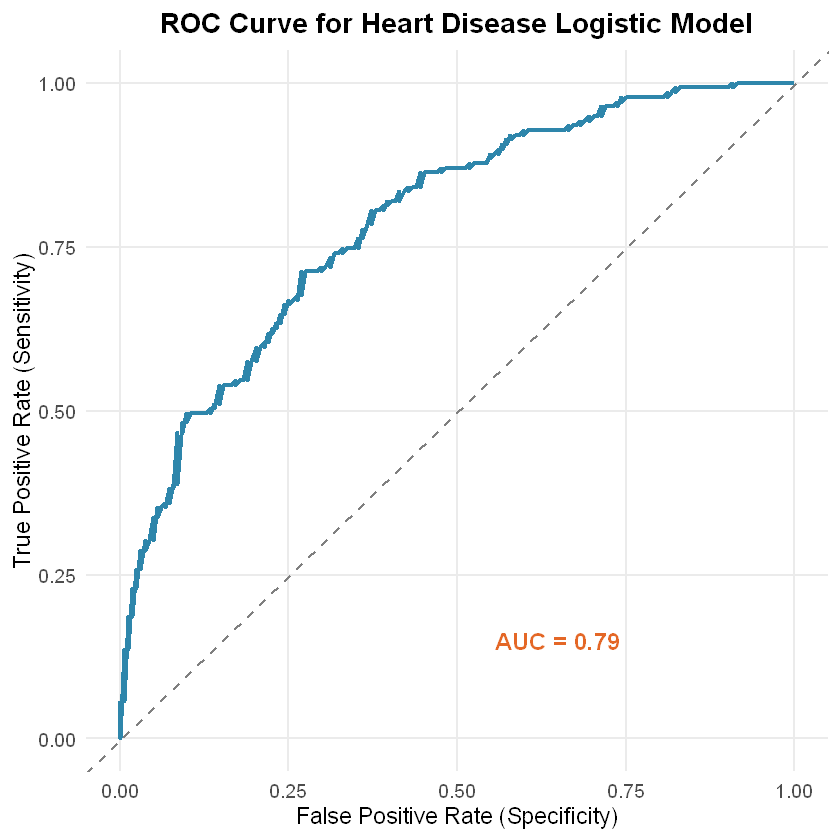

In [106]:
# Compute ROC curve
roc_obj = roc(response = hd_data$hd_binary, predictor = predict(model, type = "response"))
roc_df = data.frame(
  FalsePositiveRate = 1 - roc_obj$specificities,
  TruePositiveRate  = roc_obj$sensitivities
)

# Extract AUC
auc_value = round(auc(roc_obj), 3)

# Plot 
ggplot(roc_df, aes(x = FalsePositiveRate, y = TruePositiveRate)) +
  geom_line(color = "#2E86AB", size = 1.2) +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "gray50") +
  annotate("text", x = 0.65, y = 0.15,
           label = paste("AUC =", auc_value),
           size = 5, color = "#E46726", fontface = "bold") +
  labs(
    title = "ROC Curve for Heart Disease Logistic Model",
    x = "False Positive Rate (Specificity)",
    y = "True Positive Rate (Sensitivity)"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5),
    panel.grid.minor = element_blank()
  )
ggsave("ROC curve.png", width = 7, height = 5, dpi = 300)

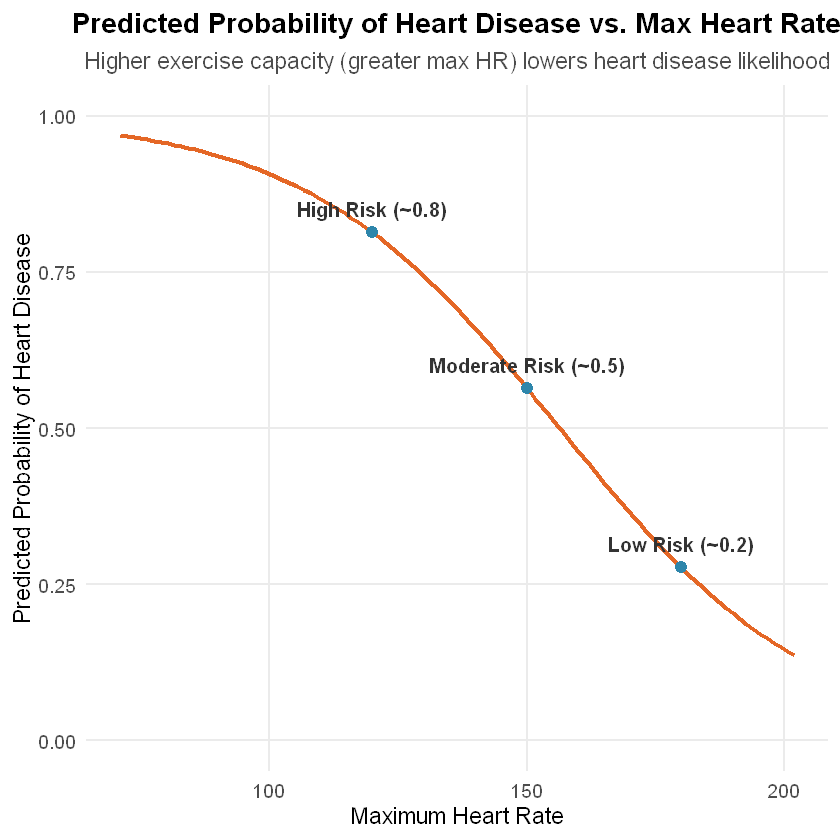

In [108]:
# Annotated points with all required variables for prediction
annot_points = data.frame(
  thalach = c(120, 150, 180),
  age = mean(hd_data$age, na.rm = TRUE),   # include age
  sex = 1                                  # include sex (assuming 1 = male)
)

# Predicted probabilities at those points
annot_points$predicted_prob = predict(model, newdata = annot_points, type = "response")

# Add labels
annot_points$label = c("High Risk (~0.8)", "Moderate Risk (~0.5)", "Low Risk (~0.2)")

# Plot with annotations
ggplot(new_data, aes(x = thalach, y = predicted_prob)) +
  geom_line(color = "#E46726", size = 1.2) +
  geom_point(data = annot_points, aes(x = thalach, y = predicted_prob),
             color = "#2E86AB", size = 3) +
  geom_text(
    data = annot_points, 
    aes(label = label),
    vjust = -1,
    color = "gray20",
    size = 4.2,
    fontface = "bold"
  ) +
  labs(
    title = "Predicted Probability of Heart Disease vs. Max Heart Rate",
    subtitle = "Higher exercise capacity (greater max HR) lowers heart disease likelihood",
    x = "Maximum Heart Rate",
    y = "Predicted Probability of Heart Disease"
  ) +
  ylim(0, 1) +
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5),
    plot.subtitle = element_text(color = "gray30", hjust = 0.5),
    panel.grid.minor = element_blank()
  )
ggsave("prob of heart disease.png", width = 7, height = 5, dpi = 300)